In [52]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from pca_tools import pca_scores
from scipy.stats import linregress

In [2]:
team_stats = pd.read_csv('team_stats.csv', index_col=0)

In [3]:
team_stats.loc['NO2016']

Season                         2016
Team                             NO
Carries                         395
rushing_yds                    1847
Fumbles                           2
Receptions                      472
receiving_yds                  5270
Attempts                        670
Completions                     472
Comp_Perc                  0.704478
passing_yds                    5270
Total_Raw_AirYards             4816
Total_Comp_AirYards            2802
TimesHit                         38
Interceptions                    16
TDs                              41
WR1                         0.22334
WR2                         0.21575
WR3                        0.169829
TE1                        0.121063
TE2                       0.0267552
RB1_rec                   0.0628083
RB2_rec                   0.0533207
RB1_rush                   0.567407
RB2_rush                   0.296697
RB3_rush                  0.0173254
QB_rush                   0.0173254
air_pct                    0

In [4]:
team_stats.columns

Index([u'Season', u'Team', u'Carries', u'rushing_yds', u'Fumbles',
       u'Receptions', u'receiving_yds', u'Attempts', u'Completions',
       u'Comp_Perc', u'passing_yds', u'Total_Raw_AirYards',
       u'Total_Comp_AirYards', u'TimesHit', u'Interceptions', u'TDs', u'WR1',
       u'WR2', u'WR3', u'TE1', u'TE2', u'RB1_rec', u'RB2_rec', u'RB1_rush',
       u'RB2_rush', u'RB3_rush', u'QB_rush', u'air_pct', u'int_rate',
       u'fumble_rate', u'QBHit_rate', u'first_rate', u'second_rate',
       u'third_short_rate', u'third_mid_rate', u'third_long_rate',
       u'fourth_rate', u'sack_rate', u'first_run_rate', u'first_pass_rate',
       u'second_run_rate', u'second_pass_rate', u'fourth_run_rate',
       u'fourth_pass_rate', u'third_short_run_rate', u'third_short_pass_rate',
       u'third_mid_run_rate', u'third_mid_pass_rate', u'third_long_run_rate',
       u'third_long_pass_rate', u'pos_pass_rate', u'pos_run_rate',
       u'long_pass_rate', u'long_run_rate'],
      dtype='object')

In [5]:
columns = np.genfromtxt('columns.pca', dtype=str)

In [6]:
columns = ['WR1', 'WR2', 'WR3', 'TE1', 'TE2', 'RB1_rec', 'RB2_rec']

In [7]:
data = team_stats[columns]
n_features = data.shape[0]
n_components = data.shape[1]

In [8]:
data.fillna(0, inplace=True)

/usr/local/lib/python2.7/dist-packages/pandas/core/frame.py:2824: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [9]:
pca = PCA()


In [10]:
pca.fit(data.values)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

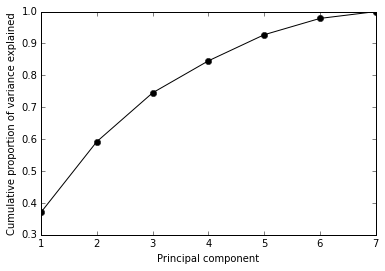

In [12]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
x = np.arange(1, n_components + 1, 1)
plt.plot(x, cumulative_variance, 'ko-')

plt.xlabel('Principal component')
plt.ylabel('Cumulative proportion of variance explained')

plt.show()

In [38]:
print pca.explained_variance_ratio_

[ 0.37036603  0.22160655  0.15316922  0.10038524  0.08189649  0.05120178
  0.02137469]


In [36]:
scores = pca_scores(data.values, pca.components_)

idx = team_stats['third_mid_rate'].argsort()
team_stats['third_mid_rate'][idx]

teamID
LA2015     0.213198
JAX2012    0.245283
ARI2012    0.250000
KC2009     0.250000
SF2011     0.252336
TEN2014    0.253968
BUF2009    0.255208
SF2009     0.258216
WAS2012    0.259669
DEN2016    0.267281
LA2011     0.269058
ARI2010    0.269608
PHI2009    0.275862
SF2016     0.276018
MIA2015    0.277228
JAX2013    0.278027
DEN2010    0.280788
SF2010     0.282927
GB2015     0.282927
BUF2011    0.284211
CLE2014    0.284314
LA2016     0.284360
MIN2015    0.286458
CLE2012    0.287736
DEN2011    0.289100
LA2010     0.290043
SF2015     0.290476
TB2013     0.292453
CIN2011    0.293578
WAS2010    0.294118
             ...   
NE2014     0.397196
JAX2009    0.397260
PIT2014    0.398010
GB2016     0.398010
IND2009    0.400000
CIN2013    0.400922
PHI2011    0.401015
DET2016    0.401042
IND2012    0.401826
IND2010    0.402010
CAR2013    0.402985
GB2011     0.403226
DAL2012    0.403846
SD2011     0.404878
NE2011     0.407407
DEN2013    0.409091
DET2013    0.411215
PHI2014    0.411255
NE2012     0.

ValueError: color kwarg must have one color per dataset

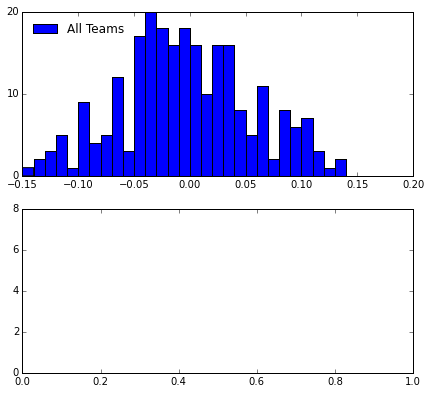

In [43]:
plt.figure(figsize=(7,10))
x = 0
top = 50
bins = np.arange(-.15, .16, .01)

plt.subplot(311)
plt.yticks(np.arange(0, 50, 10))

plt.hist(scores[x, :], bins=bins, color='b',label='All Teams')

plt.legend(frameon=False, loc=2)


sorted_scores = scores[x, idx]
plt.subplot(312)
plt.yticks(np.arange(0, 10, 2))

lowest = plt.hist(sorted_scores[:top], alpha=1, bins=bins, color='b', label="Bottom Teams")
plt.legend(frameon=False, loc=2)

plt.subplot(313)
plt.yticks(np.arange(0, 10, 2))
highest = plt.hist(sorted_scores[256-top:], alpha=1, bins=bins, color='b', label='Top Teams')
plt.legend(frameon=False, loc=2)

plt.xlabel('Component 1 Score')

plt.show()

In [40]:
print pca.components_[0:]

[[-0.59206552 -0.32810015 -0.05678686  0.72483944  0.05851238  0.09581229
   0.02424997]
 [ 0.73856336 -0.28858866 -0.3933387   0.45540246 -0.07325889 -0.04838546
  -0.03776242]
 [-0.01894904 -0.73735287 -0.11519819 -0.43510861  0.36289414  0.34016404
   0.077187  ]
 [-0.05486406  0.37284425 -0.4577097  -0.00596796 -0.14867949  0.78986048
   0.04957964]
 [-0.13013539  0.28254681 -0.56761395 -0.03107189  0.67948424 -0.34061374
  -0.04862585]
 [ 0.2451746   0.17156995  0.5016382   0.23843816  0.55640155  0.35866779
  -0.40464091]
 [ 0.15351757  0.13075108  0.21322442  0.1415735   0.25715788  0.06501844
   0.90745316]]


In [17]:
print data.columns

Index([u'WR1', u'WR2', u'WR3', u'TE1', u'TE2', u'RB1_rec', u'RB2_rec'], dtype='object')


In [41]:
idx = np.where(pca.components_[0, :]**2 > 0.1)
print(pca.components_[0, idx])
print(data.columns[idx])

[[-0.59206552 -0.32810015  0.72483944]]
Index([u'WR1', u'WR2', u'TE1'], dtype='object')


In [19]:
idx = np.where(pca.components_[1, :]**2 > 0.1)
print(pca.components_[1, idx])
print(data.columns[idx])

[[ 0.73856336 -0.3933387   0.45540246]]
Index([u'WR1', u'WR3', u'TE1'], dtype='object')


In [20]:
idx = np.where(pca.components_[2, :]**2 > 0.1)
print(pca.components_[2, idx])
print(data.columns[idx])

[[-0.73735287 -0.43510861  0.36289414  0.34016404]]
Index([u'WR2', u'TE1', u'TE2', u'RB1_rec'], dtype='object')


In [21]:
idx = np.where(pca.components_[3, :]**2 > 0.1)
print(pca.components_[3, idx])
print(data.columns[idx])

[[ 0.37284425 -0.4577097   0.78986048]]
Index([u'WR2', u'WR3', u'RB1_rec'], dtype='object')


In [22]:
idx = np.where(pca.components_[4, :]**2 > 0.1)
print(pca.components_[4, idx])
print(data.columns[idx])

[[-0.56761395  0.67948424 -0.34061374]]
Index([u'WR3', u'TE2', u'RB1_rec'], dtype='object')


In [23]:
idx = np.where(pca.components_[5, :]**2 > 0.1)
print(pca.components_[5, idx])
print(data.columns[idx])

[[ 0.5016382   0.55640155  0.35866779 -0.40464091]]
Index([u'WR3', u'TE2', u'RB1_rec', u'RB2_rec'], dtype='object')


In [24]:
idx = np.where(pca.components_[6, :]**2 > 0.1)
print(pca.components_[6, idx])
print(data.columns[idx])

[[ 0.90745316]]
Index([u'RB2_rec'], dtype='object')


In [25]:
idx = np.where(pca.components_[7, :]**2 > 0.1)
print(pca.components_[7, idx])
print(data.columns[idx])

IndexError: index 7 is out of bounds for axis 0 with size 7

In [ ]:
idx = np.where(pca.components_[8, :]**2 > 0.1)
print(pca.components_[8, idx])
print(data.columns[idx])

In [ ]:
idx = np.where(pca.components_[9, :]**2 > 0.1)
print(pca.components_[9, idx])
print(data.columns[idx])

In [ ]:
idx = np.where(pca.components_[10, :]**2 > 0.1)
print(pca.components_[10, idx])
print(data.columns[idx])

In [ ]:
idx = np.where(pca.components_[11, :]**2 > 0.1)
print(pca.components_[11, idx])
print(data.columns[idx])

In [ ]:
idx = np.where(pca.components_[12, :]**2 > 0.1)
print(pca.components_[12, idx])
print(data.columns[idx])

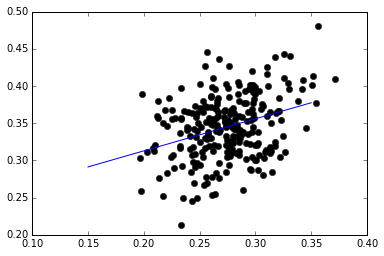

(0.33120722931887447, 5.7200595180510798e-08)


In [55]:
# Early conversion on 3rd and mid
plt.plot(team_stats.second_rate, team_stats.third_mid_rate, 'ko')
m, b, r_value, p_value, std_err = linregress(team_stats.second_rate, team_stats.third_mid_rate)
x = np.arange(0.15, 0.4, 0.05)
y = m * x + b
plt.plot(x, y)
plt.show()
print(r_value, p_value)

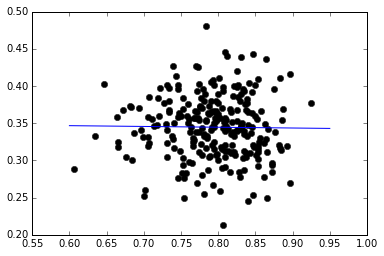

(-0.013359655540941815, 0.83154699873701443)


In [59]:
# Play selection on 3rd and mid
plt.plot(team_stats.third_mid_pass_rate, team_stats.third_mid_rate, 'ko')
m, b, r_value, p_value, std_err = linregress(team_stats.third_mid_pass_rate, team_stats.third_mid_rate)
x = np.arange(0.6, 1., 0.05)
y = m * x + b
plt.plot(x, y)
plt.show()
print(r_value, p_value)

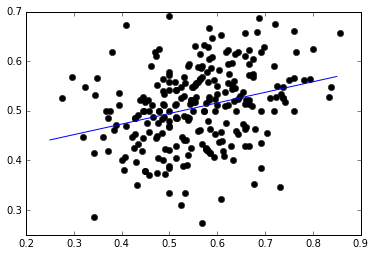

(0.28929756501722881, 2.5120531510549882e-06)


In [64]:
# Play selection on 3rd and short
plt.plot(team_stats.third_short_run_rate, team_stats.third_short_rate, 'ko')
m, b, r_value, p_value, std_err = linregress(team_stats.third_short_run_rate, team_stats.third_short_rate)
x = np.arange(0.25, .9, 0.05)
y = m * x + b
plt.plot(x, y)
plt.show()
print(r_value, p_value)

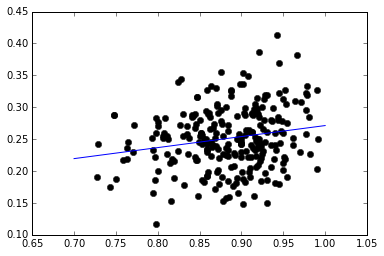

(0.1917695233625864, 0.0020564856849678644)


In [66]:
# Play selection on 3rd and long
plt.plot(team_stats.third_long_pass_rate, team_stats.third_long_rate, 'ko')
m, b, r_value, p_value, std_err = linregress(team_stats.third_long_pass_rate, team_stats.third_long_rate)
x = np.arange(0.7, 1., 0.05)
y = m * x + b
plt.plot(x, y)
plt.show()
print(r_value, p_value)

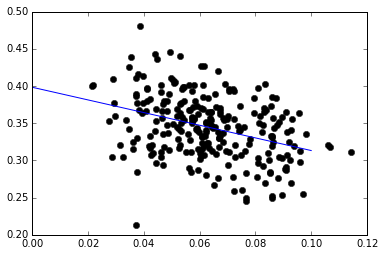

(-0.36056005140695557, 2.8192978676022894e-09)


In [84]:
# Play selection on 3rd and mid
plt.plot(team_stats.sack_rate, team_stats.third_mid_rate, 'ko')
m, b, r_value, p_value, std_err = linregress(team_stats.sack_rate, team_stats.third_mid_rate)
x = np.arange(0.0, .15, 0.1)
y = m * x + b
plt.plot(x, y)
plt.show()
print(r_value, p_value)